In [43]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [44]:
df = pd.read_csv('C:/Users/OlhaIshchenko/Documents/Daten_Analyse/unterricht/csv_Datei/california_housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [46]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [47]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

In [48]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [49]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: >

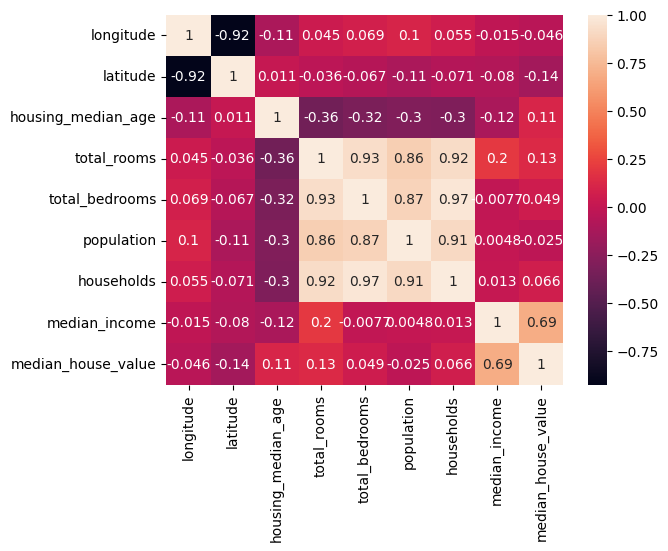

In [50]:
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)

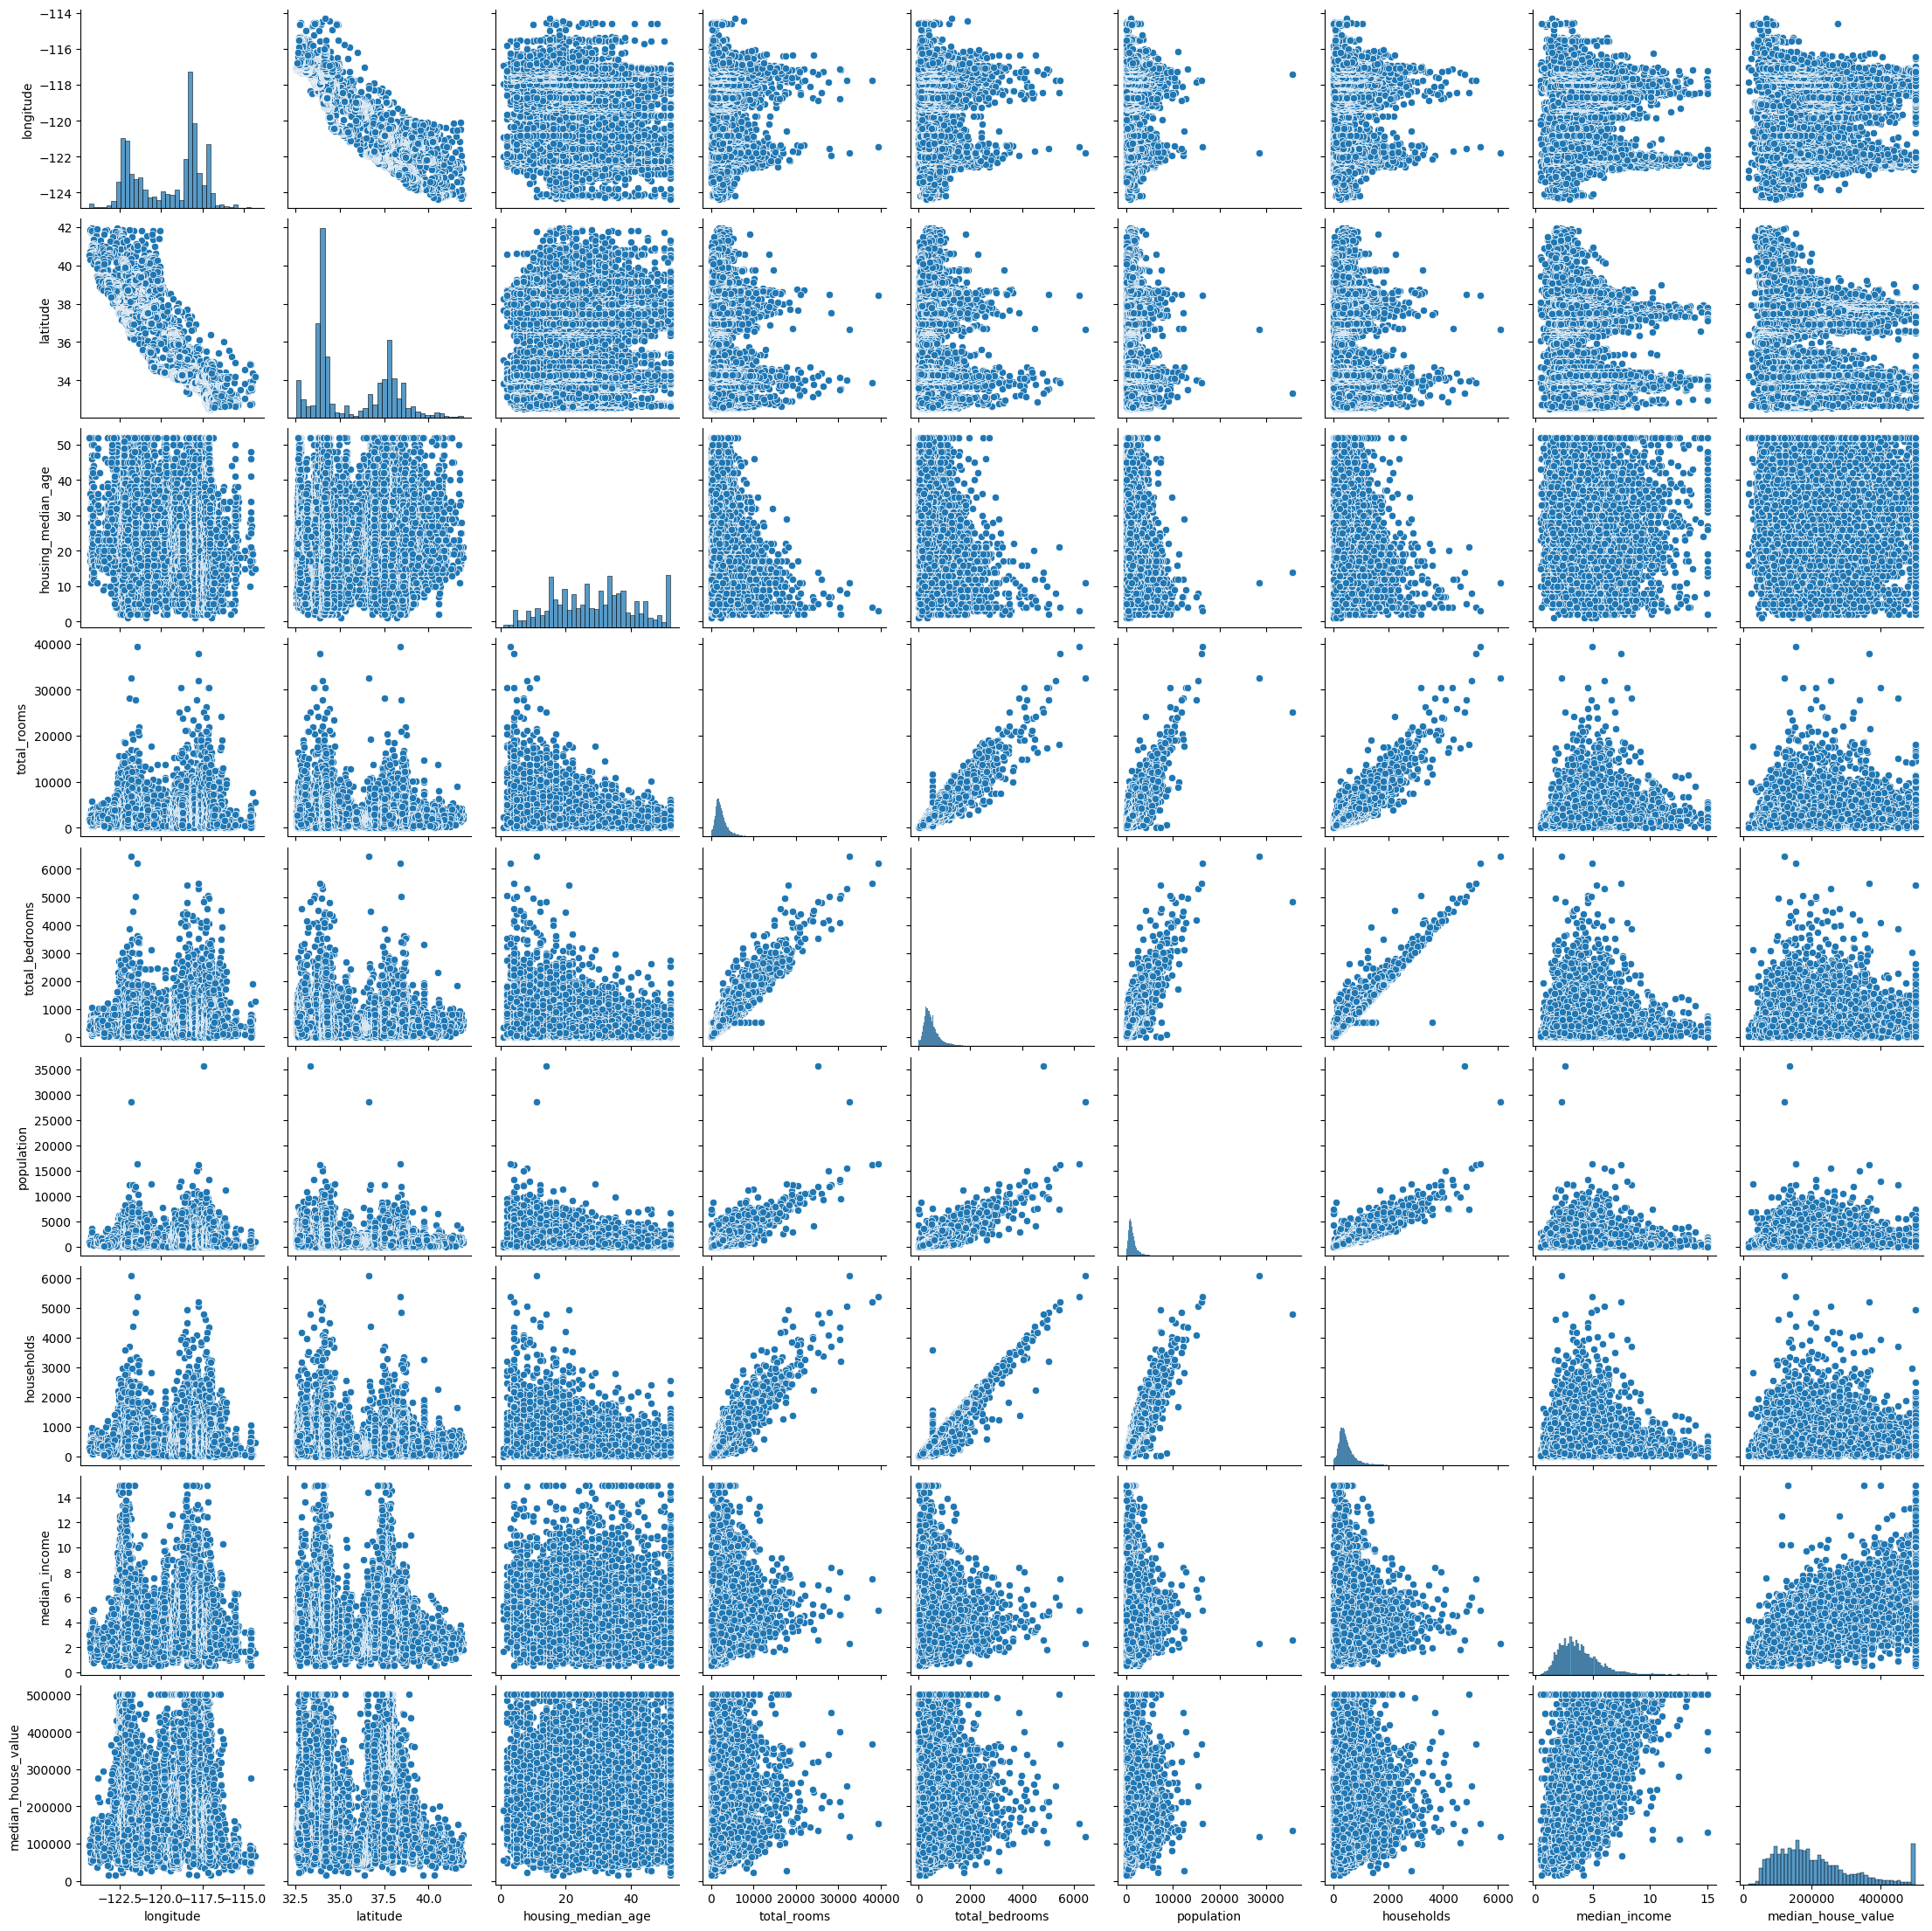

In [51]:
sns.pairplot(df.select_dtypes(include=np.number))

In [52]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [53]:
X = df[['median_income']]
y = df['median_house_value']
simple_l_m = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.20, 
                                                    random_state=42)
simple_l_m.fit(X_train, y_train)

LinearRegression()

In [54]:
simple_l_m.score(X_train, y_train)

0.4769927345820525

In [55]:
simple_l_m.score(X_test, y_test)

0.45885918903846656

In [56]:
X = df[['housing_median_age','total_rooms','median_income']]
y = df['median_house_value']
simple_l_m = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.20, 
                                                    random_state=42)
multiply_l_m = LinearRegression()
multiply_l_m.fit(X_train, y_train)

LinearRegression()

In [57]:
multiply_l_m.score(X_train, y_train)

0.5172148009737971

In [58]:
multiply_l_m.score(X_test, y_test)

0.4991503592397153

In [59]:
X = df[['housing_median_age', 'latitude','total_rooms', 'total_bedrooms', 'households','median_income']]
y = df['median_house_value']
simple_l_m = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.20, 
                                                    random_state=42)
multiply_5_l_m = LinearRegression()
multiply_5_l_m.fit(X_train, y_train)

LinearRegression()

In [60]:
multiply_5_l_m.score(X_train, y_train)

0.5540145192388106

In [61]:
multiply_5_l_m.score(X_test, y_test)

0.5211583344715089

In [62]:
multiply_5_l_m.coef_

array([ 1.93857459e+03, -3.37179581e+03, -2.51000645e+01,  1.52331792e+02,
        2.05188636e+00,  4.91898379e+04])

In [63]:
multiply_5_l_m.intercept_

np.float64(64281.53169730783)